# Workshop 1: House Pricing Regression
In this workshop you will need to train a regression neural network to estimate the pricing of houses of California. The main blocks of the workshop are:

- Get the data from Keras repository and visualize it.
- Pre-process the data.
- Design the network.
- Train the network.
- Evaluate the model.

[Info of the data](https://www.kaggle.com/datasets/camnugent/california-housing-prices))

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

# 1. Get the data (Already in Colab)

In [2]:
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [4]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
train_data.shape, test_data.shape

((17000, 9), (3000, 9))

In [6]:
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

# 2. Pre-process the data.

In [8]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
)
x_test_scaled = pd.DataFrame(
    standard_scaler.transform(x_test),
    columns = x_test.columns
)

In [9]:
x_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


# 3. Design the network.

In [10]:
def create_model():
  model = Sequential([
      Dense(32, input_dim=8, activation='relu'),  # capas ocultas, número de capas como te lo da la gana, con eso se juega
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='linear')               # última capa: núm tiene que ser igual como los numeros de variables objetivos; función linear para que salga el mismo valor que entra
    ])
  return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='mse',                           # función de perdidas: mean squared error 
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['mse']
)

# 4. Train the network.

In [13]:
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 8s 7ms/step - loss: 51075080192.0000 - mse: 51075080192.0000 - val_loss: 76384739328.0000 - val_mse: 76384739328.0000
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 43024154624.0000 - mse: 43024154624.0000 - val_loss: 66708197376.0000 - val_mse: 66708197376.0000
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 20187531264.0000 - mse: 20187531264.0000 - val_loss: 51923554304.0000 - val_mse: 51923554304.0000
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 13231788032.0000 - mse: 13231788032.0000 - val_loss: 43847204864.0000 - val_mse: 43847204864.0000
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 11679746048.0000 - mse: 11679746048.0000 - val_loss: 36627668992.0000 - val_mse: 36627668992.0000
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 10345038848.0000 - mse: 10345038848.0000 - val_loss: 29829050368.0

In [14]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

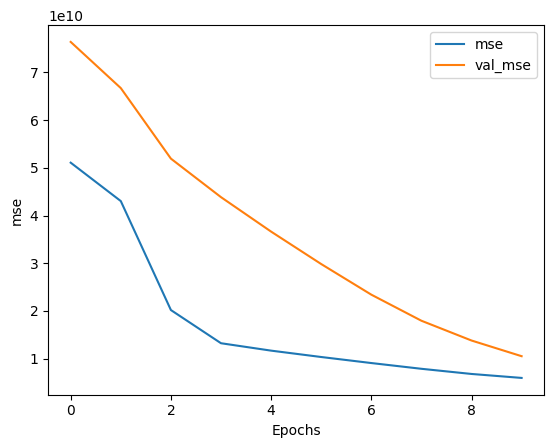

In [15]:
# Loss: MSE | Learnin Rate: 1e-03
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 2s 4ms/step - loss: 22451974144.0000 - mse: 22451974144.0000 - val_loss: 12877217792.0000 - val_mse: 12877217792.0000
Epoch 2/10
213/213 [==============================] - 1s 5ms/step - loss: 5110323200.0000 - mse: 5110323200.0000 - val_loss: 6437094400.0000 - val_mse: 6437094400.0000
Epoch 3/10
213/213 [==============================] - 1s 5ms/step - loss: 4376340480.0000 - mse: 4376340480.0000 - val_loss: 5579606528.0000 - val_mse: 5579606528.0000
Epoch 4/10
213/213 [==============================] - 1s 3ms/step - loss: 4244644608.0000 - mse: 4244644608.0000 - val_loss: 5397902336.0000 - val_mse: 5397902336.0000
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 4158817536.0000 - mse: 4158817536.0000 - val_loss: 5437870592.0000 - val_mse: 5437870592.0000
Epoch 6/10
213/213 [==============================] - 1s 3ms/step - loss: 4119201536.0000 - mse: 4119201536.0000 - val_loss: 5399204352.0000 - val_mse: 5399

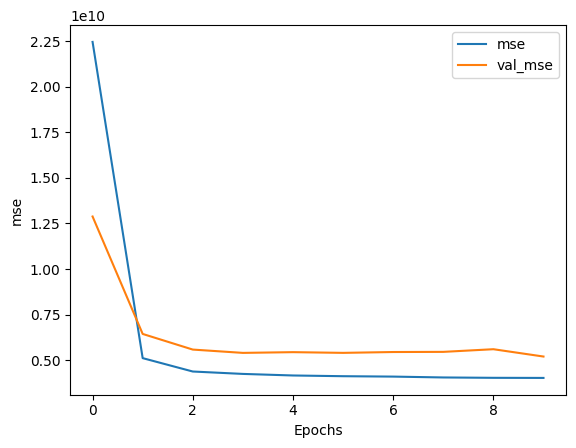

In [16]:
# Loss: MSE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['mse']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 3s 4ms/step - loss: 82.4994 - msle: 82.4994 - val_loss: 52.9506 - val_msle: 52.9506
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 36.2963 - msle: 36.2963 - val_loss: 33.1430 - val_msle: 33.1430
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 22.9585 - msle: 22.9585 - val_loss: 23.9063 - val_msle: 23.9063
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 16.2110 - msle: 16.2110 - val_loss: 18.3829 - val_msle: 18.3829
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 12.0573 - msle: 12.0573 - val_loss: 14.6291 - val_msle: 14.6291
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 9.2327 - msle: 9.2327 - val_loss: 11.8902 - val_msle: 11.8902
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 7.2005 - msle: 7.2005 - val_loss: 9.8128 - val_msle: 9.8128
Epoch 8/10
213/213 [====================

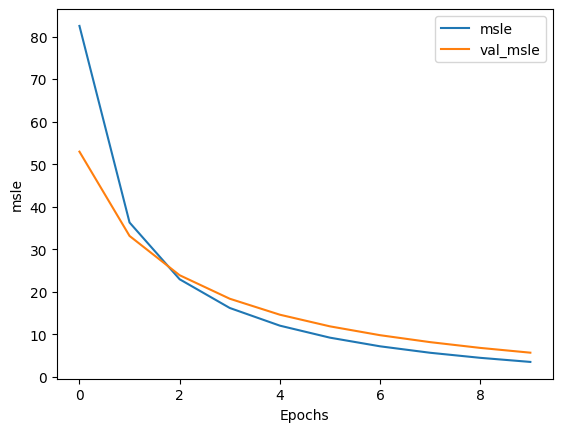

In [17]:
# Loss: MSLE | Learnin Rate: 1e-03
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 3s 5ms/step - loss: 19.5643 - msle: 19.5643 - val_loss: 5.3392 - val_msle: 5.3392
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 1.2600 - msle: 1.2600 - val_loss: 1.6167 - val_msle: 1.6167
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 0.4098 - msle: 0.4098 - val_loss: 0.9048 - val_msle: 0.9048
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2972 - msle: 0.2972 - val_loss: 0.6598 - val_msle: 0.6598
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2572 - msle: 0.2572 - val_loss: 0.5339 - val_msle: 0.5339
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2305 - msle: 0.2305 - val_loss: 0.4526 - val_msle: 0.4526
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2101 - msle: 0.2101 - val_loss: 0.3947 - val_msle: 0.3947
Epoch 8/10
213/213 [==============================] - 1s 4ms

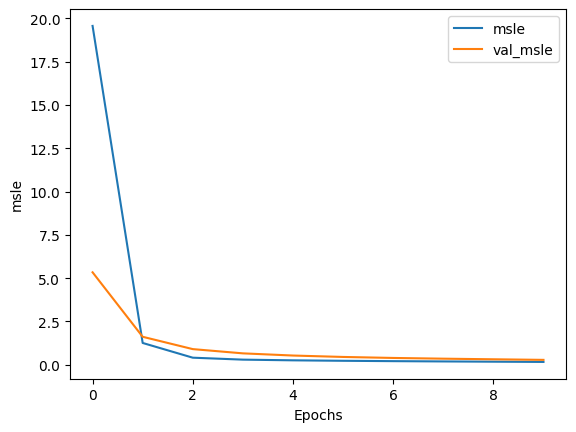

In [18]:
# Loss: MSLE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 3s 5ms/step - loss: 4.4324 - msle: 4.4324 - val_loss: 0.1120 - val_msle: 0.1120
Epoch 2/10
213/213 [==============================] - 1s 3ms/step - loss: 0.1106 - msle: 0.1106 - val_loss: 0.1224 - val_msle: 0.1224
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0989 - msle: 0.0989 - val_loss: 0.1087 - val_msle: 0.1087
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0922 - msle: 0.0922 - val_loss: 0.1316 - val_msle: 0.1316
Epoch 5/10
213/213 [==============================] - 1s 3ms/step - loss: 0.0908 - msle: 0.0908 - val_loss: 0.1330 - val_msle: 0.1330
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0836 - msle: 0.0836 - val_loss: 0.1157 - val_msle: 0.1157
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.0838 - msle: 0.0838 - val_loss: 0.1205 - val_msle: 0.1205
Epoch 8/10
213/213 [==============================] - 1s 4ms/s

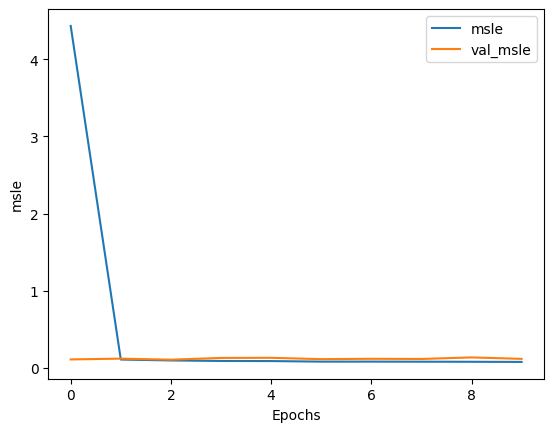

In [19]:
# Loss: MSLE | Learnin Rate: 1
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

# Exercise 1: Re-train the model to improve its performance and evaluate it on the test set

Epoch 1/100
213/213 [==============================] - 2s 4ms/step - loss: 20.1939 - msle: 20.1939 - val_loss: 5.9265 - val_msle: 5.9265
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 1.6594 - msle: 1.6594 - val_loss: 2.0558 - val_msle: 2.0558
Epoch 3/100
213/213 [==============================] - 1s 5ms/step - loss: 0.5330 - msle: 0.5330 - val_loss: 1.0806 - val_msle: 1.0806
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 0.3309 - msle: 0.3309 - val_loss: 0.7304 - val_msle: 0.7304
Epoch 5/100
213/213 [==============================] - 1s 4ms/step - loss: 0.2748 - msle: 0.2748 - val_loss: 0.5668 - val_msle: 0.5668
Epoch 6/100
213/213 [==============================] - 1s 4ms/step - loss: 0.2446 - msle: 0.2446 - val_loss: 0.4701 - val_msle: 0.4701
Epoch 7/100
213/213 [==============================] - 1s 4ms/step - loss: 0.2216 - msle: 0.2216 - val_loss: 0.4054 - val_msle: 0.4054
Epoch 8/100
213/213 [==============================] 

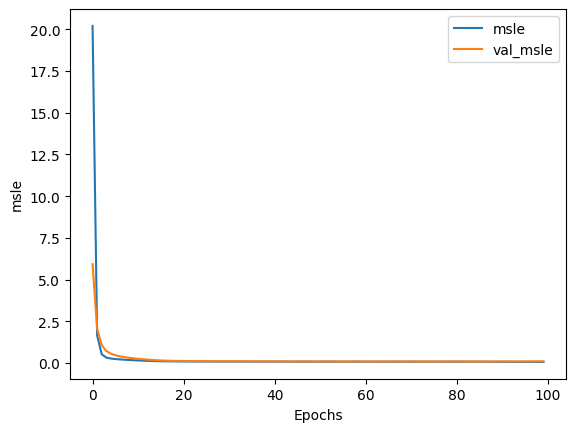

In [24]:
# Train the model
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['msle']
)

history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

In [36]:
# Predict on the test set
test_data['prediction'] = model.predict(x_test_scaled)
test_data['error'] = (test_data['median_house_value'] - test_data['prediction']).abs()
test_data['error_pct'] = (test_data['error'] / test_data['median_house_value'])*100

94/94 [==============================] - 0s 1ms/step


In [37]:
# Compare the results with the ground truth
print(test_data['error_pct'].mean())
test_data.head(20)

22.01245102390285


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction,error,error_pct
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,343587.156250,1112.843750,0.322844
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,185781.953125,9281.953125,5.258897
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,272489.312500,1989.312500,0.735421
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,348867.593750,18867.593750,5.717453
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,80823.531250,876.468750,1.072789
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0,53582.535156,13417.464844,20.026067
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,78803.710938,11803.710938,17.617479
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0,176590.687500,9690.687500,5.806284
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0,206097.812500,11697.812500,6.017393
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0,131157.875000,33042.125000,20.123097
